In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv


# import important libraries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import RobustScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

# Reading data and analysis

In [3]:
data = pd.read_csv("/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv") #loading the dataset from kaggle
data.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
# Data Exploration
data.info() # we can know now that the data has no null values and so clean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
data.describe() #describ numerical features in data

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
print(data.shape) #the data has 9 columns and 10000 rows

(100000, 9)


## Univariate Visualization

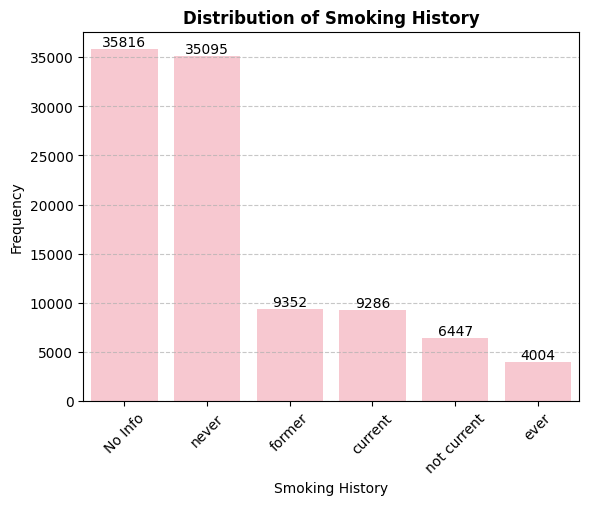

In [7]:
# The distribution of smoking history
for i, val in enumerate(data["smoking_history"].value_counts().values):
    plt.text(i, val, str(val), ha='center', va='bottom') # print the value frequency of every feature 

#make a barplot to explain the distribution
sns.barplot(x=data["smoking_history"].value_counts().index, 
                y=data["smoking_history"].value_counts().values, 
                color = "pink")
plt.xlabel('Smoking History') # set a title for x-axis
plt.ylabel('Frequency') #set a title for  axis
plt.xticks(rotation=45) # rotate x-label 45 degrees to be more clear 
plt.grid(axis='y', linestyle='--', alpha=0.7)  # make gridlines in the back
plt.title("Distribution of Smoking History", fontweight = "bold"); # set the title of the plot

In [8]:
print(data["gender"].value_counts())

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64


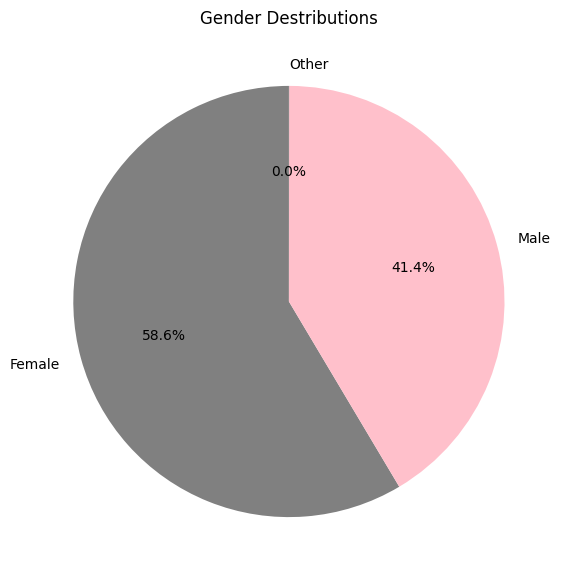

In [9]:
# The distribution of gender
fig = plt.figure(figsize=(10, 7))
plt.pie(data["gender"].value_counts().values, labels=data["gender"].value_counts().index, colors = ["grey", "pink"], 
        textprops=dict(color="black"), startangle=90, autopct='%1.1f%%')

plt.title("Gender Destributions")
plt.show()

In [10]:
data["gender"].value_counts(), data["smoking_history"].value_counts()

(gender
 Female    58552
 Male      41430
 Other        18
 Name: count, dtype: int64,
 smoking_history
 No Info        35816
 never          35095
 former          9352
 current         9286
 not current     6447
 ever            4004
 Name: count, dtype: int64)

In [11]:
# dealing with categorical object data 
gender_map = {"Male": 0, "Female": 1, "Other": 2}
data["gender"] = data["gender"].map(gender_map)

smoking_map = {"No Info": 0, "never": 1, "former": 2, "current": 3, "not current": 4, "ever": 5}
data["smoking_history"] = data["smoking_history"].map(smoking_map)

In [12]:
data.head(3)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,1,25.19,6.6,140,0
1,1,54.0,0,0,0,27.32,6.6,80,0
2,0,28.0,0,0,1,27.32,5.7,158,0


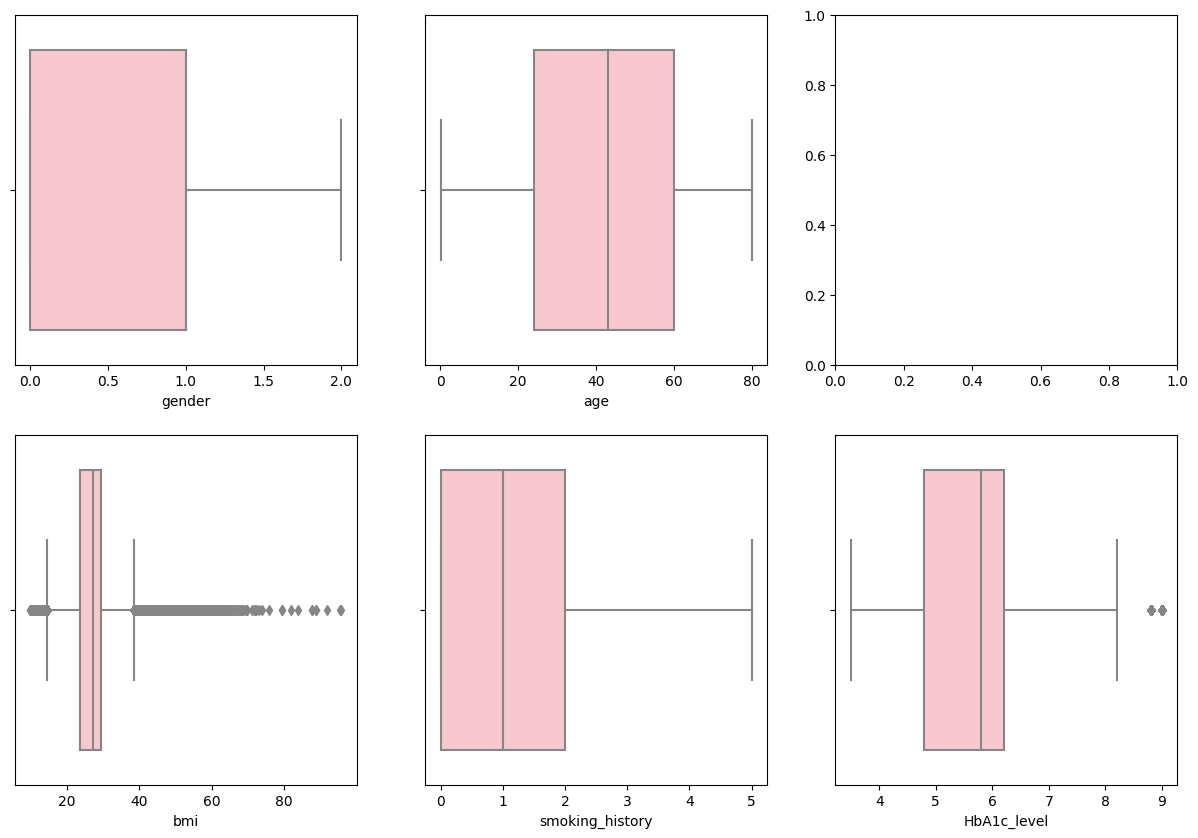

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.boxplot(ax=axes[0, 0], x=data['gender'], color = 'pink' )
sns.boxplot(ax=axes[0, 1], x=data['age'], color = 'pink')
sns.boxplot(ax=axes[1, 0], x=data['bmi'], color = 'pink')
sns.boxplot(ax=axes[1, 1], x=data['smoking_history'], color = 'pink')
sns.boxplot(ax=axes[1, 2], x=data['HbA1c_level'], color = 'pink');

In [14]:
# Show bmi in more detail
fig = px.violin(data, y="bmi",  box=True, color = "diabetes",
                title = "BMI Distribution over Data", violinmode='overlay')
fig.show()

## Bivariate Visualization (Heat Map)

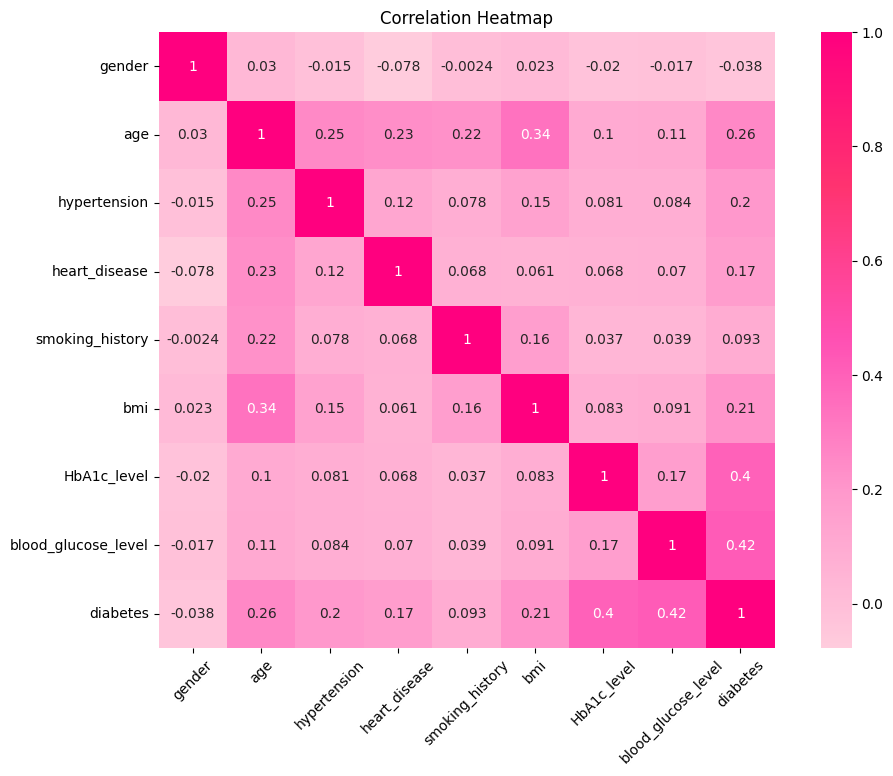

In [15]:
plt.figure(figsize=(12, 8)) 
colors = ["#ffccdd", "#ff99cc", "#ff50b3", "#ff3370", "#ff007f"]
pink_cmap = LinearSegmentedColormap.from_list("pink", colors)
sns.heatmap(data.corr(), annot=True, cmap= pink_cmap, square=True)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)  
plt.show()

# Data Preprocessing

In [16]:
#separate data and labels
x = data.drop(columns = "diabetes", axis = 1)
y  = data["diabetes"]

In [17]:
# To preprocess the numerical data
scaler = RobustScaler() # as we have seen in bmi column there aremany outliers so we have used robust scaler
scaler.fit(x)
scaler_data = scaler.transform(x)
x = scaler_data  
print(x)

[[ 0.          1.02777778  0.         ... -0.35798319  0.57142857
   0.        ]
 [ 0.          0.30555556  0.         ...  0.          0.57142857
  -1.01694915]
 [-1.         -0.41666667  0.         ...  0.         -0.07142857
   0.30508475]
 ...
 [-1.          0.63888889  0.         ...  0.08571429 -0.07142857
   0.25423729]
 [ 0.         -0.52777778  0.         ...  1.36134454 -1.28571429
  -0.6779661 ]
 [ 0.          0.38888889  0.         ... -0.82184874  0.57142857
  -0.84745763]]


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify= y,  random_state = 42) #splitting the data into train and test

# Modeling

In [19]:
classifier = svm.SVC(kernel = 'linear', C=1, random_state=0) #build the model
classifier.fit(x_train, y_train) # training the model on our data

result_train = classifier.predict(x_train) #apply the model to predict the whole training data
train_accuracy = accuracy_score(result_train, y_train) # check the accuracy score value of the model
print(train_accuracy)

result_test = classifier.predict(x_test) #apply the model to predict testing data
test_accuracy = accuracy_score(result_test, y_test) # check the accuracy score value of the model
print(test_accuracy) #applying cross validation to check model accuracy

0.9607625
0.961
